<h1> <center>   AMAZON STOCK ANALYSIS

___

<h2> OBJECTIVE

- Stock Price Movement Analysis

- Trading Volume Trends

- Moving Averages Alignment

- MACD Trend Analysis

- Distribution of Daily Returns

- 30-Day Moving Average Comparison

_______

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock= yf.Ticker('AMZN')
df=stock.history(period= '3y')
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-05-06 00:00:00-04:00,114.849998,119.050499,113.081497,114.772499,124260000,0.0,0.0
1,2022-05-09 00:00:00-04:00,111.312500,114.000000,107.957001,108.789001,128124000,0.0,0.0
2,2022-05-10 00:00:00-04:00,111.250000,112.642502,107.170998,108.859001,105434000,0.0,0.0
3,2022-05-11 00:00:00-04:00,108.103500,110.155998,104.428497,105.372002,109704000,0.0,0.0
4,2022-05-12 00:00:00-04:00,102.750000,110.780502,102.405502,106.930496,132026000,0.0,0.0
...,...,...,...,...,...,...,...,...
746,2025-04-29 00:00:00-04:00,183.990005,188.020004,183.679993,187.389999,41667300,0.0,0.0
747,2025-04-30 00:00:00-04:00,182.169998,185.050003,178.850006,184.419998,55176500,0.0,0.0
748,2025-05-01 00:00:00-04:00,190.630005,191.809998,187.500000,190.199997,74266000,0.0,0.0
749,2025-05-02 00:00:00-04:00,191.440002,192.880005,186.399994,189.979996,77809300,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          751 non-null    datetime64[ns, America/New_York]
 1   Open          751 non-null    float64                         
 2   High          751 non-null    float64                         
 3   Low           751 non-null    float64                         
 4   Close         751 non-null    float64                         
 5   Volume        751 non-null    int64                           
 6   Dividends     751 non-null    float64                         
 7   Stock Splits  751 non-null    float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 47.1 KB


In [4]:
df.shape

(751, 8)

In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
746,2025-04-29 00:00:00-04:00,183.990005,188.020004,183.679993,187.389999,41667300,0.0,0.0
747,2025-04-30 00:00:00-04:00,182.169998,185.050003,178.850006,184.419998,55176500,0.0,0.0
748,2025-05-01 00:00:00-04:00,190.630005,191.809998,187.500000,190.199997,74266000,0.0,0.0
749,2025-05-02 00:00:00-04:00,191.440002,192.880005,186.399994,189.979996,77809300,0.0,0.0
750,2025-05-05 00:00:00-04:00,186.509995,188.179993,185.529999,186.350006,35161600,0.0,0.0


In [6]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
df.describe().round()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,751.0,751.0,751.0,751.0,751.0,751.0,751.0
mean,150.0,152.0,148.0,150.0,54918954.0,0.0,0.0
std,41.0,41.0,41.0,41.0,25229518.0,0.0,1.0
min,83.0,83.0,81.0,82.0,15007500.0,0.0,0.0
25%,115.0,117.0,113.0,115.0,38636550.0,0.0,0.0
50%,142.0,144.0,141.0,143.0,48795100.0,0.0,0.0
75%,184.0,186.0,182.0,184.0,64330050.0,0.0,0.0
max,239.0,243.0,238.0,242.0,223133400.0,0.0,20.0


In [8]:
df['Daily Return'] = df['Close'].pct_change()

In [9]:
df['Year'] = df['Date'].dt.year

In [10]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Year
0,2022-05-06 00:00:00-04:00,114.849998,119.050499,113.081497,114.772499,124260000,0.0,0.0,NaN,2022
1,2022-05-09 00:00:00-04:00,111.312500,114.000000,107.957001,108.789001,128124000,0.0,0.0,-0.052134,2022
2,2022-05-10 00:00:00-04:00,111.250000,112.642502,107.170998,108.859001,105434000,0.0,0.0,0.000643,2022
3,2022-05-11 00:00:00-04:00,108.103500,110.155998,104.428497,105.372002,109704000,0.0,0.0,-0.032032,2022
4,2022-05-12 00:00:00-04:00,102.750000,110.780502,102.405502,106.930496,132026000,0.0,0.0,0.014790,2022
...,...,...,...,...,...,...,...,...,...,...
746,2025-04-29 00:00:00-04:00,183.990005,188.020004,183.679993,187.389999,41667300,0.0,0.0,-0.001652,2025
747,2025-04-30 00:00:00-04:00,182.169998,185.050003,178.850006,184.419998,55176500,0.0,0.0,-0.015849,2025
748,2025-05-01 00:00:00-04:00,190.630005,191.809998,187.500000,190.199997,74266000,0.0,0.0,0.031341,2025
749,2025-05-02 00:00:00-04:00,191.440002,192.880005,186.399994,189.979996,77809300,0.0,0.0,-0.001157,2025


In [11]:
df['Close'].max().round()

242.0

In [12]:
max_close = df[df['Close'] == df['Close'].max()]
max_close

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Year
688,2025-02-04 00:00:00-05:00,239.009995,242.520004,238.029999,242.059998,29713800,0.0,0.0,0.019543,2025


In [13]:
df.max()

Date            2025-05-05 00:00:00-04:00
Open                           239.020004
High                           242.520004
Low                            238.029999
Close                          242.059998
Volume                          223133400
Dividends                             0.0
Stock Splits                         20.0
Daily Return                     0.121778
Year                                 2025
dtype: object

In [14]:
df.sample()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Year
285,2023-06-27 00:00:00-04:00,128.630005,130.089996,127.550003,129.179993,46801000,0.0,0.0,0.014529,2023


- <h4> Stock Price Movement Analysis

In [15]:
fig = go.Figure(data=[go.Ohlc(x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])

fig.update_layout(title="AMZN OHLC Chart",xaxis_title="Date",yaxis_title="Stock Price (USD)",template="plotly_dark")

fig.show()

fig.write_html("amazon_ohlc.html")


- <h4> Trading Volume Trends

In [16]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], name='Volume', marker=dict(color='#5B9787')))

fig.update_layout(title="Amazon Trading Volume", xaxis_title="Date",yaxis_title="Volume",template="plotly_dark")

fig.show()

fig.write_html("amazon_trading_volume.html")


- <h4> Moving Averages Alignment

In [17]:
sma_50= df['Close'].rolling(window=50).mean()
sma_200= df['Close'].rolling(window=200).mean()

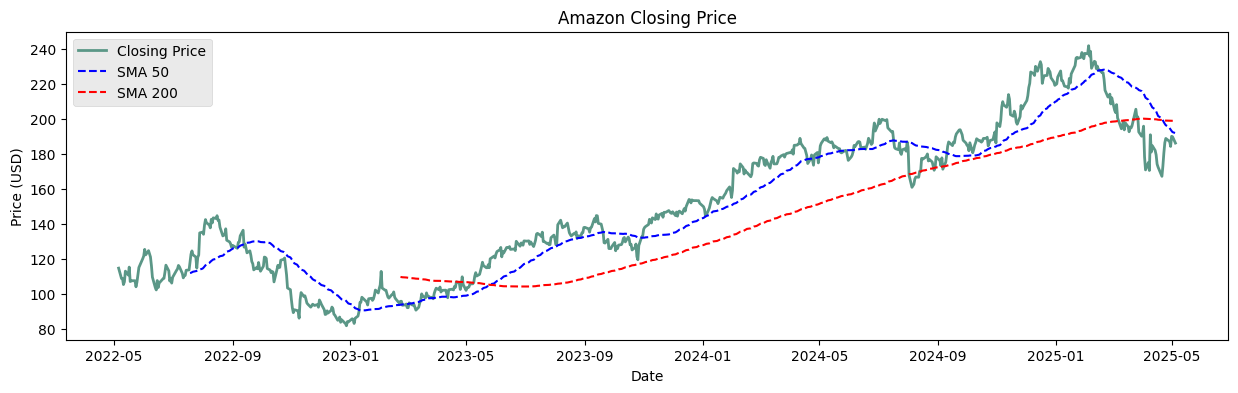

In [18]:
plt.figure(figsize=(15,4))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='#5B9787',linewidth=2)
plt.plot(df['Date'], sma_50, label='SMA 50', color='blue', linestyle='dashed')
plt.plot(df['Date'], sma_200, label='SMA 200', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Amazon Closing Price')
plt.style.use("ggplot")
plt.legend()
plt.show()

- <h4> MACD Trend Analysis

In [19]:
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
macd = ema_12 - ema_26
signal = macd.ewm(span=9, adjust=False).mean()

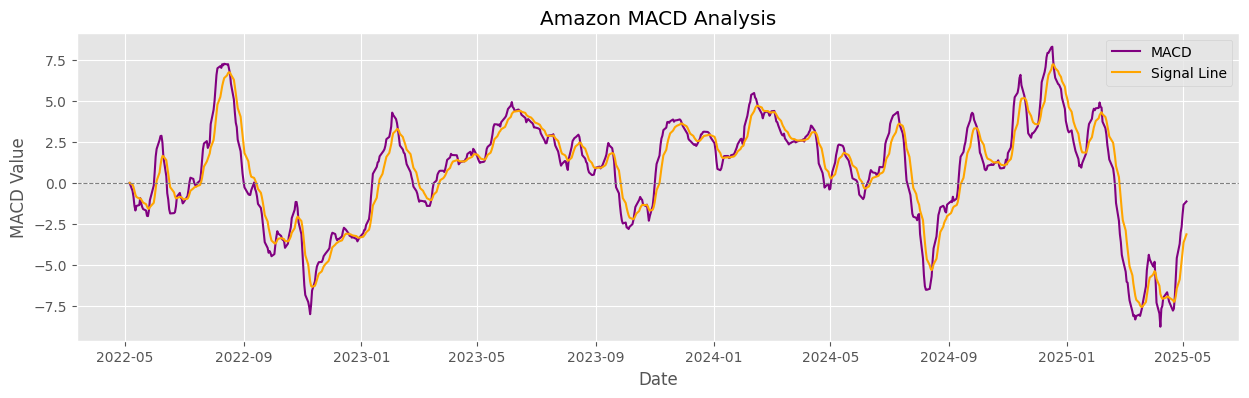

In [20]:
plt.figure(figsize=(15,4))
plt.plot(df['Date'], macd, label='MACD', color='purple')
plt.plot(df['Date'], signal, label='Signal Line', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.title('Amazon MACD Analysis')
plt.legend()
plt.show()

- <h4> Distribution of Daily Returns

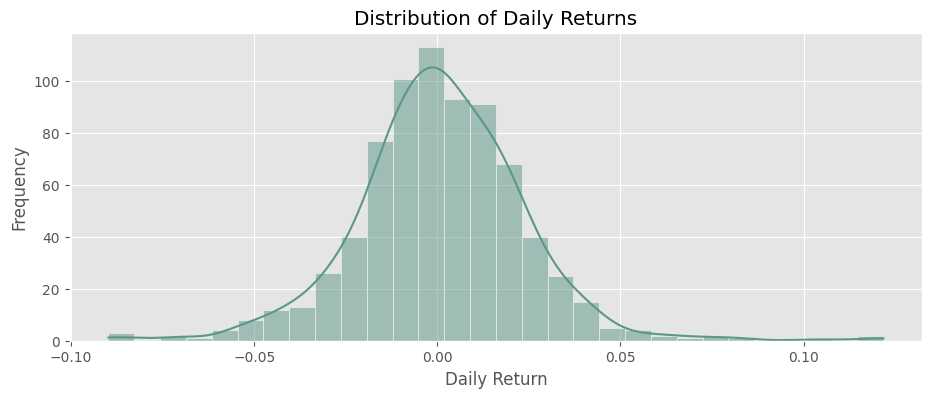

In [21]:
plt.figure(figsize=(11,4))
sns.histplot(df['Daily Return'], bins=30,kde=True, color='#5B9787')
plt.title('Distribution of Daily Returns')
plt.ylabel('Frequency')
plt.show()

- <h4> 30-Day Moving Average Comparison

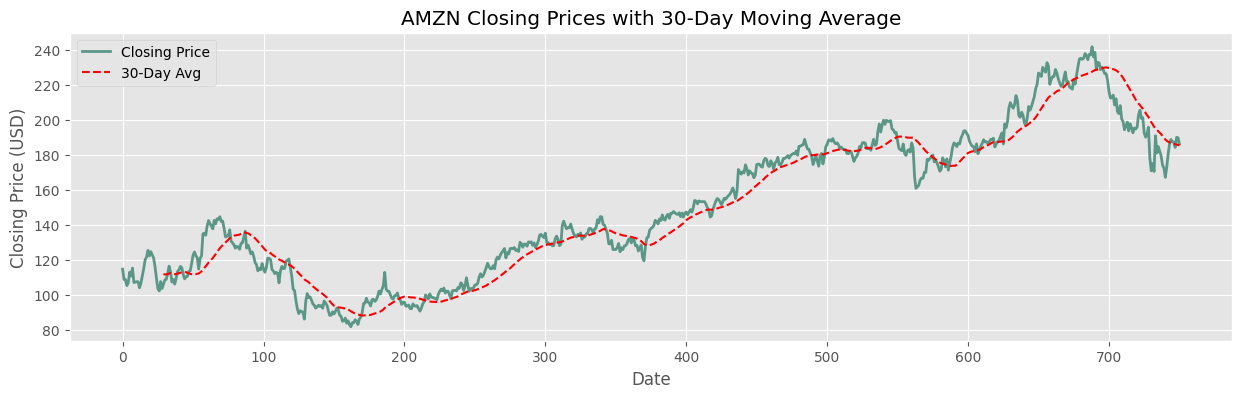

In [22]:
plt.figure(figsize=(15, 4))
df['Close'].plot(label='Closing Price', color= '#5B9787', linewidth=2)
df['Close'].rolling(window=30).mean().plot(label='30-Day Avg', linestyle='--', color='red')
plt.title( 'AMZN Closing Prices with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [23]:
df.to_csv('amazon_stock_analysis_data.csv', index=False)